**About the NOTEBOOK**
This notebook demonstrates how to use Watson Visual Recognition API and OpenCV using the Python. The advantage of using the Watson Visual Recognition API over the Graphic User Interface of Watson Studio of IBM Cloud is to be able to automate the training, and testing of a Computer Vision model. For questions contact **MBehara@AdelleTech**

**Install IBM Watson & OpenCV libraries**

In [1]:
! pip install --upgrade ibm-watson opencv-python

  Stored in directory: C:\Users\rahdi\AppData\Local\pip\Cache\wheels\b7\10\b4\509307276e9d558a6b06d8e69f8faf6cfbdf2d1b83abb6b8d4
  Stored in directory: C:\Users\rahdi\AppData\Local\pip\Cache\wheels\6a\42\50\f96888116b329578304f9dda4693cef6f3e76e18272d22cb6c
Successfully built ibm-watson ibm-cloud-sdk-core


In [8]:
#Import the necessary libraries 
# --Computer Vision 2 
# --URL library of Python Standard Library related Internet Protocols & support
# --Matplotlib (Math Plotting Library)
# --PyLab of SciPy for expedient numerical computations (supposed alternative to Matlab)


import cv2
import urllib.request
from matplotlib import pyplot as plt
from pylab import rcParams

#Define a Function to retrieve any image in JPEG format using the absolute reference URL & plot the same
def plot_image(image_url, size = (10,8)):
    #Download an image using URL & display it in the notebook
    urllib.request.urlretrieve(image_url, "image.jpg")      # --Download the Image
    image = cv2.imread("image.jpg")                         # --Use cv2.imread() function to read the image
    
    #If the image is in red correct the color coding from BGR to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    rcParams['figure.figsize'] = size[0], size[1]           # --Set the Image size (width x height)- set as argument
    
    plt.axis("off")
    plt.imshow(image, cmap="Greys_r")
    plt.show()    
    

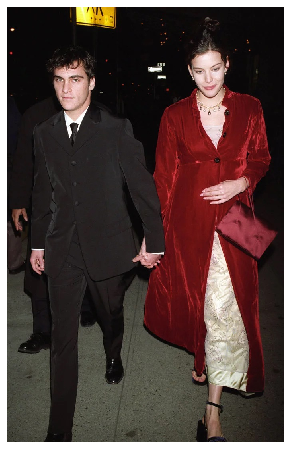

In [9]:
image_url = 'watson-computer-vision-fashion-archive.cloud/JoaquinLiv.jpg'
plot_image(image_url)

**Initialize Watson Visual Recognition Object** (visualRecog)

In [29]:
#Import JSON which is the structure of the API Response
import json

#First import the VisualRecognition library, but also the IAMAuthenticator
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator


myApiKey = 'RemovedForSecurity'

#With Version 4 of the service onwards, pass the authenticator object
myAuthenticator = IAMAuthenticator(myApiKey)

visualRecognition = VisualRecognitionV3(version = '2019-01-01', 
                                        authenticator = myAuthenticator)


#Get the Web URL of the image 
image_url = 'watson-computer-vision-fashion-archive.cloud/JoaquinLiv.jpg'


#Identify & Classify the image by invoking Watson Visual Recognition Service 
# threshold is set to 0.6, that means only classes that has a confidence score of 0.6 or greater will be shown
classes = visualRecognition.classify(url=image_url,
                          threshold='0.6',
                          classifier_ids='default').get_result()

#Display the information returned by Watson Visual Recognition Service
print(json.dumps(classes, indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "suit of clothes",
              "score": 0.646
            },
            {
              "class": "garment",
              "score": 0.747
            },
            {
              "class": "coat",
              "score": 0.606
            },
            {
              "class": "overgarment",
              "score": 0.612
            },
            {
              "class": "clothing",
              "score": 0.601
            },
            {
              "class": "dark red color",
              "score": 0.872
            },
            {
              "class": "alizarine red color",
              "score": 0.708
            }
          ]
        }
      ],
      "source_url": "https://watson-computer-vision-fashion-archive.s3.us-east.cloud-object-storage.appdomain.cloud/JoaquinLiv.jpg",
      "resolved_url

Using Watson Visual Recogntion service, **retrieve information about a consumer product** and dispaly it as a table. 
For this let's use the pandas dataframe magic (**NORMALIZE & SORT on classification score** using the JSON document). 

In [31]:
from pandas.io.json import json_normalize

#Define a function called getDF_WatsonVisualRecogSvc
def getDF_WatsonVisualRecogSvc(imageURL, apiKey):

    #Create an authenticator using API Key (Version 4 onwards)
    myAuthenticator = IAMAuthenticator(apiKey)

    #Create Visual Recognition object
    visualRecognition = VisualRecognitionV3(version = '2019-01-01', 
                                        authenticator = myAuthenticator)

    #Create 
    jsonResponse = visualRecognition.classify(url=imageURL,
                              threshold='0.6',
                              classifier_ids='default').get_result()
    
    retrievedClasses = jsonResponse['images'][0]['classifiers'][0]['classes']
    
    df = json_normalize(retrievedClasses).sort_values('score', ascending=False).reset_index(drop=True)
    
    return df

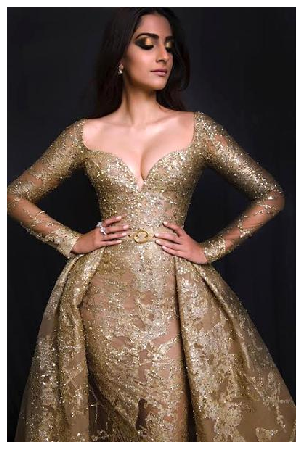

,class,score,type_hierarchy
0,Indian red color,0.959,NaN
1,dress,0.766,NaN
2,gown,0.709,NaN
3,tea gown,0.691,/dress/gown/tea gown
4,maroon color,0.655,NaN
5,fabric,0.603,NaN
6,clothing,0.601,NaN


In [39]:
#Let us pass a Fancy Feast Kitty Food can and see what Watson says about it 
#imageURL = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/76011_MAIN._AC_SS190_V1446845310_.jpg'
imageURL = 'watson-computer-vision-fashion-archive.cloud/Sonam.jpg'
apiKey = 'RemovedForSecurity'

plot_image(imageURL)

getDF_WatsonVisualRecogSvc(imageURL, apiKey)